 # Experiment 5: Binary classification

Content

1. Introduction
2. Used libraries
3. Reading Clean Data from a CSV File
4. Case of study and data understanding
5. Split the data
6. Assess Baseline Model
7. Training a model
    
    7.1 Decision Tree Classifier with Grid Search
    
    7.2 Random Forest Classifier with Grid Search
    
    7.3 Extra trees Classifier with Grid Search
    
    7.4 Random Forest Classifier with Random Search
    
    7.5 Random Forest Classifier with Random Search based on feature importance
    
    7.6 Random Forest Classifier with Random Search using one hot encoder
    
    
8. Conclusion
9. References

## 1. Introduction

In the following study, we will fit a binary classification model based on a Decision tree, random forest and extra trees classifier using Hyperparameters tuning and Cross-Validation to reduce overfitting.

The objective is to predict if an existing customer is more likely to buy a new car as accurately as possible.

## 2. Used libraries 

In [1]:
#working with data
import pandas as pd
import numpy as np

#plotting data
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 3. Reading Clean Data from a CSV File

Clean data:

In [267]:
df_cleaned = pd.read_csv("df_cleaned1.csv")
#clean columns
df_cleaned.drop(df_cleaned.columns[0], axis=1, inplace=True)

In [268]:
df_cleaned.shape

(131337, 17)

In [269]:
df_cleaned

,Target,age_band,car_model,car_segment,age_of_vehicle_years,sched_serv_warr,non_sched_serv_warr,sched_serv_paid,non_sched_serv_paid,total_paid_services,total_services,mth_since_last_serv,annualised_mileage,num_dealers_visited,num_serv_dealer_purchased,Female,Male
0,0,3,1,3,9,2,10,3,7,5,6,9,8,10,4,0,1
1,0,0,2,1,6,10,3,10,4,9,10,6,10,7,10,0,0
2,0,0,3,2,9,10,9,10,9,10,10,7,10,6,10,0,1
3,0,0,3,2,5,8,5,8,4,5,6,4,10,9,7,0,0
4,0,0,2,1,8,9,4,10,7,9,8,5,4,4,9,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131332,1,0,3,2,7,10,10,9,10,10,10,3,6,10,10,0,0
131333,1,0,3,2,4,10,10,10,10,10,10,2,3,10,10,0,0
131334,1,0,5,2,4,4,9,5,4,3,8,4,7,10,10,0,0
131335,1,0,5,2,2,1,10,1,10,9,8,3,6,7,10,0,0


## 4. Case of study and data understanding 

**[4.1]** Hypothesis

The case study has the following hypothesis:
We will perform hyperparameters tuning and Cross-Validation decision trees-based algorithms to predict if an existing customer is more likely to buy a new car. Assuming that a combination of hyperparameters will allow reduced overfitting and perform better on the validation and test data.

## 5. Split the data 

**[5.1]** Split data and test

Stratify=y will be used to distribute the data for train, valid and test proportionally, preserving the distribution of the two classes (Brownlee, 2020a), (Brownlee, 2020d).

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
df_cleaned.columns

Index(['Target', 'age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male'],
      dtype='object')

In [272]:
X = df_cleaned[['age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male']].values
y = df_cleaned['Target'].values

In [273]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [274]:
X_data.shape

(105069, 16)

In [275]:
y_data.shape

(105069,)

In [276]:
X_test.shape

(26268, 16)

In [277]:
y_test.shape

(26268,)

**[5.2]** Split train and validation

In [278]:
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [279]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(84055, 16)
(21014, 16)
(26268, 16)
(84055,)
(21014,)
(26268,)


**[5.3]** Count classes

In [280]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

In [281]:
np.unique(y_val, return_counts=True)

(array([0, 1], dtype=int64), array([20449,   565], dtype=int64))

In [282]:
np.unique(y_test, return_counts=True)

(array([0, 1], dtype=int64), array([25564,   704], dtype=int64))

The count per label indicates that we are preserving the class distribution with 2,7% values class 1 over class 0.

## 6. Assess Baseline Model

This study will use F2 score. The reason behind the metric selection is based on the highly imbalanced dataset and the fact that we care more about positive class for the purpose of the prediction (Czakon, 2022) (Malato, 2021) and (Olugbenga, 2022). 

We want the prediction of repurchases to be as correct as possible and avoid false negative predictions (type II error) where the campaigns can lose potential clients. Moreover, we will prevent excessive type I error by predicting false potential clients.

This phenomenon could occur easily in this dataset due to the unbalanced classes in the study. (Brownlee, 2020a)(Brownlee, 2020b)


**[6.1]** base model

In [19]:
from statistics import mode

In [20]:
y_mode = mode(y_train)
y_mode

0

In [21]:
y_train.shape

(84055,)

In [22]:
y_base = np.full(y_train.shape, y_mode)

In [23]:
y_base

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [24]:
y_base.shape

(84055,)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, average_precision_score

In [26]:
print(accuracy_score(y_train, y_base))
print(f1_score(y_train, y_base, average='weighted'))
print(precision_score(y_train, y_base))
print(recall_score(y_train, y_base))
print(average_precision_score(y_train, y_base))
print(fbeta_score(y_train, y_base, beta=2, pos_label=1, average='binary'))

0.9732080185592766
0.9599939169916978
0.0
0.0
0.026791981440723336
0.0


**[6.2]** confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix

In [28]:
results = confusion_matrix(y_train, y_base)
print(results)

[[81803     0]
 [ 2252     0]]


**[6.3]** Count classes

In [29]:
np.unique(y_train, return_counts=True)

(array([0, 1], dtype=int64), array([81803,  2252], dtype=int64))

## 7. Training a model

Based on: (So, 2023), (scikit-learn developers, 2023a) and (scikit-learn developers, 2023b)

note: We will not use data standardisation since algorithms based on decision trees are invariant according to the scale of the data and do not use distance metrics for the learning process (Filho, 2023).

**[7.1]** Decision Tree Classifier with Grid Search

In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [151]:
hyperparams_grid = {
    'max_depth': np.arange(25, 45, 5),
    'min_samples_split': np.arange(1, 10, 3),
    'min_samples_leaf': np.arange(1, 16, 5)
    }
hyperparams_grid

{'max_depth': array([25, 30, 35, 40]),
 'min_samples_split': array([1, 4, 7]),
 'min_samples_leaf': array([ 1,  6, 11])}

In [152]:
#instantiate the RandomForestClassifier 
dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')

In [153]:
#custon metric for performance
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [154]:
#Instantiate a KFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

Note: 
* shuffle = True, the data is shuffled by your random_state. Otherwise, the data is shuffled by np.random (as default)

* For imbalanced classification, we will use stratified k-fold cross-validation that enforces the class distribution in each data split, preserving the original dataset's distribution. (Brownlee, 2020)

In [155]:
#Instantiate a GridSearchCV
grid_search_dt = GridSearchCV(dt, hyperparams_grid, cv=kfold, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1)

* verbosity: 
1 : the computation time for each fold and parameter candidate is displayed
2 : the score is also displayed

* cv: number of fold cross validation

* return_train_score = True, the cv_results_ attribute will include training scores to get insights on how parameter impact the overfitting

* n_jobs: -1 means using all processors. 1 as default means 1 job in parallel.

* scoring: metric to evaluate the performance of the cross-validated model. Here we are defining a custom metric F2Beta 

Based on: (scikit-learn developers, 2023a), (scikit-learn developers, 2023b), (scikit-learn developers, 2023c), (scikit-learn developers, 2023d)

In [156]:
#Fit the GridSearchCV on the training set
grid_search_dt.fit(X_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([25, 30, 35, 40]),
                         'min_samples_leaf': array([ 1,  6, 11]),
                         'min_samples_split': array([1, 4, 7])},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2, pos_label=1, average=binary),
             verbose=2)

In [157]:
grid_search_dt.best_params_

{'max_depth': 25, 'min_samples_leaf': 6, 'min_samples_split': 4}

In [158]:
print(grid_search_dt.score(X_train, y_train))
print(grid_search_dt.score(X_val, y_val))
print(grid_search_dt.score(X_test, y_test))

0.9008720697655812
0.7536647546207774
0.7547655847501288


**[7.2]** Random Forest Classifier with Grid Search

In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [118]:
hyperparams_grid = {
    'n_estimators': np.arange(50, 80, 10),
    'max_depth': np.arange(10, 30, 5),
    'min_samples_leaf': np.arange(1, 16, 5),
    'max_features': np.arange(1, 12, 4)
    }
hyperparams_grid

{'n_estimators': array([50, 60, 70]),
 'max_depth': array([10, 15, 20, 25]),
 'min_samples_leaf': array([ 1,  6, 11]),
 'max_features': array([1, 5, 9])}

In [119]:
#instantiate the RandomForestClassifier 
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

* verbosity: 
1 : the computation time for each fold and parameter candidate is displayed
2 : the score is also displayed

* cv: number of fold cross validation

* return_train_score = True, the cv_results_ attribute will include training scores to get insights on how parameter impact the overfitting

* n_jobs: -1 means using all processors. 1 as default means 1 job in parallel.

* scoring: metric to evaluate the performance of the cross-validated model. Here we are defining a custom metric F2Beta 

Based on: (scikit-learn developers, 2023a), (scikit-learn developers, 2023b), (scikit-learn developers, 2023c), (scikit-learn developers, 2023d)

In [120]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [121]:
#Instantiate a KFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

Note: 
* shuffle = True, the data is shuffled by your random_state. Otherwise, the data is shuffled by np.random (as default)

* For imbalanced classification, we will use stratified k-fold cross-validation that enforces the class distribution in each data split, preserving the original dataset's distribution. (Brownlee, 2020)

In [122]:
#Instantiate a GridSearchCV
grid_search_rf = GridSearchCV(rf, hyperparams_grid, cv=kfold, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1)

In [123]:
#Fit the GridSearchCV on the training set
grid_search_rf.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([10, 15, 20, 25]),
                         'max_features': array([1, 5, 9]),
                         'min_samples_leaf': array([ 1,  6, 11]),
                         'n_estimators': array([50, 60, 70])},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2, pos_label=1, average=binary),
             verbose=3)

In [124]:
grid_search_rf.best_params_

{'max_depth': 25, 'max_features': 5, 'min_samples_leaf': 6, 'n_estimators': 70}

In [125]:
print(grid_search_rf.score(X_train, y_train))
print(grid_search_rf.score(X_val, y_val))
print(grid_search_rf.score(X_test, y_test))

0.9458663074591683
0.8457627118644067
0.8566058002148228


**[7.3]** Extra trees Classifier with Grid Search

In [162]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [163]:
hyperparams_grid = {
    'n_estimators': np.arange(50, 80, 10),
    'max_depth': np.arange(10, 30, 5),
    'min_samples_leaf': np.arange(1, 16, 5),
    'max_features': np.arange(1, 12, 4)
    }
hyperparams_grid

{'n_estimators': array([50, 60, 70]),
 'max_depth': array([10, 15, 20, 25]),
 'min_samples_leaf': array([ 1,  6, 11]),
 'max_features': array([1, 5, 9])}

In [164]:
#instantiate the RandomForestClassifier 
et = ExtraTreesClassifier(random_state=42, class_weight='balanced')

* verbosity: 
1 : the computation time for each fold and parameter candidate is displayed
2 : the score is also displayed

* cv: number of fold cross validation

* return_train_score = True, the cv_results_ attribute will include training scores to get insights on how parameter impact the overfitting

* n_jobs: -1 means using all processors. 1 as default means 1 job in parallel.

* scoring: metric to evaluate the performance of the cross-validated model. Here we are defining a custom metric F2Beta 

Based on: (scikit-learn developers, 2023a), (scikit-learn developers, 2023b), (scikit-learn developers, 2023c), (scikit-learn developers, 2023d)

In [165]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [166]:
#Instantiate a KFold 
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

Note: 
* shuffle = True, the data is shuffled by your random_state. Otherwise, the data is shuffled by np.random (as default)

* For imbalanced classification, we will use stratified k-fold cross-validation that enforces the class distribution in each data split, preserving the original dataset's distribution. (Brownlee, 2020)

In [167]:
#Instantiate a GridSearchCV
grid_search_et = GridSearchCV(et, hyperparams_grid, cv=kfold, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1)

In [168]:
#Fit the GridSearchCV on the training set
grid_search_et.fit(X_train, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=1, shuffle=True),
             estimator=ExtraTreesClassifier(class_weight='balanced',
                                            random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': array([10, 15, 20, 25]),
                         'max_features': array([1, 5, 9]),
                         'min_samples_leaf': array([ 1,  6, 11]),
                         'n_estimators': array([50, 60, 70])},
             return_train_score=True,
             scoring=make_scorer(fbeta_score, beta=2, pos_label=1, average=binary),
             verbose=2)

In [169]:
grid_search_et.best_params_

{'max_depth': 25, 'max_features': 9, 'min_samples_leaf': 6, 'n_estimators': 70}

In [170]:
print(grid_search_et.score(X_train, y_train))
print(grid_search_et.score(X_val, y_val))
print(grid_search_et.score(X_test, y_test))

0.9354490321508682
0.83994708994709
0.844922592495408


**[7.4]** Random Forest Classifier with Random Search

In [283]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [284]:
hyperparams_dist = {
    'n_estimators': randint(65, 80),
    'max_depth': randint(20, 40),
    'min_samples_leaf': randint(1, 11),
    'max_features': randint(1, 9)
    }
hyperparams_dist

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1bc62880>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1d00a2b0>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1c2ec0a0>,
 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1ba8f4c0>}

In [199]:
#instantiate the RandomForestClassifier 
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

* verbosity: 
1 : the computation time for each fold and parameter candidate is displayed
2 : the score is also displayed

* cv: number of fold cross validation

* return_train_score = True, the cv_results_ attribute will include training scores to get insights on how parameter impact the overfitting

* n_jobs: -1 means using all processors. 1 as default means 1 job in parallel.

* scoring: metric to evaluate the performance of the cross-validated model. Here we are defining a custom metric F2Beta 

Based on: (scikit-learn developers, 2023a), (scikit-learn developers, 2023b), (scikit-learn developers, 2023c), (scikit-learn developers, 2023d)

In [200]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [201]:
#Instantiate a KFold 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

Note: 
* shuffle = True, the data is shuffled by your random_state. Otherwise, the data is shuffled by np.random (as default)

* For imbalanced classification, we will use stratified k-fold cross-validation that enforces the class distribution in each data split, preserving the original dataset's distribution. (Brownlee, 2020)

In [202]:
#Instantiate a GridSearchCV
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, cv=kfold, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1, random_state=1)

In [203]:
#Fit the random Search on the training set
random_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BA13FA0>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BA13C40>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BA23BB0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C2038A7F0>},
                   random_state=1, return_train_score=True,
                   scoring=make_scorer(fbeta_score, beta=2, pos_label=1, average=binary),
                   verbos

In [204]:
random_search_rf.best_params_

{'max_depth': 27, 'max_features': 8, 'min_samples_leaf': 7, 'n_estimators': 74}

In [205]:
print(random_search_rf.score(X_train, y_train))
print(random_search_rf.score(X_val, y_val))
print(random_search_rf.score(X_test, y_test))

0.9383355614973262
0.8341742347796838
0.8542780748663102


Build the model

In [183]:
rf = RandomForestClassifier(random_state=42, n_estimators= 76, max_depth = 25, min_samples_leaf= 5, max_features = 3, class_weight='balanced')

In [184]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=3,
                       min_samples_leaf=5, n_estimators=76, random_state=42)

In [185]:
y_train_preds = rf.predict(X_train)

In [186]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9929926833620843
0.9933816934085385
0.7932980599647266
0.9986678507992895
0.7922769595048811
0.9495060373216245


In [187]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)#confusion matrix

[[81217   586]
 [    3  2249]]


In [188]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9878652327020082
0.9884256044384562
0.7266081871345029
0.879646017699115
0.64239393618657
0.8440896739130433


In [189]:
#confusion matrix
results = confusion_matrix(y_val, y_val_preds)
print(results)

[[20262   187]
 [   68   497]]


In [190]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.9880082229328461
0.9886374351904244
0.7222857142857143
0.8977272727272727
0.651156562030934
0.8561365483608777


In [191]:
#confusion matrix
results = confusion_matrix(y_test, y_test_preds)
print(results)

[[25321   243]
 [   72   632]]


Analysing feature importance in the model

In [192]:
rf.feature_importances_

array([0.00218876, 0.01618675, 0.00691512, 0.08758958, 0.16093396,
       0.03621833, 0.09749502, 0.02625439, 0.02908295, 0.12651989,
       0.18847043, 0.10339187, 0.05121624, 0.05585553, 0.00327413,
       0.00840705])

In [193]:
X = df_cleaned[['age_band', 'car_model', 'car_segment',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased', 'Female', 'Male']]

In [194]:
#dataframe with the values
feat_imp_rf = pd.DataFrame(
    {
        'feature': X.columns,
     'feature_importance': rf.feature_importances_
     }
)

In [195]:
feat_imp_rf = feat_imp_rf.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf

,feature,feature_importance
0,mth_since_last_serv,0.188470
1,sched_serv_warr,0.160934
2,total_services,0.126520
3,annualised_mileage,0.103392
4,sched_serv_paid,0.097495
5,age_of_vehicle_years,0.087590
6,num_serv_dealer_purchased,0.055856
7,num_dealers_visited,0.051216
8,non_sched_serv_warr,0.036218
9,total_paid_services,0.029083


In [196]:
import altair as alt

alt.Chart(feat_imp_rf).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

**[7.5]** Random Forest Classifier with Random Search based on feature importance

drop columns based on feature importance: Male, car_segment, Female, age_band

In [285]:
from sklearn.model_selection import train_test_split

In [287]:
X = df_cleaned[['car_model',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased']].values
y = df_cleaned['Target'].values

In [288]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [289]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [219]:
hyperparams_dist = {
    'n_estimators': randint(65, 80),
    'max_depth': randint(20, 40),
    'min_samples_leaf': randint(1, 11),
    'max_features': randint(1, 9)
    }
hyperparams_dist

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1ba281f0>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1ba89280>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1ba287f0>,
 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1fbf3370>}

In [220]:
#instantiate the RandomForestClassifier 
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [221]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [222]:
#Instantiate a KFold 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [223]:
#Instantiate a GridSearchCV
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, cv=kfold, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1, random_state=1)

In [224]:
#Fit the random Search on the training set
random_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BA89280>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1FBF3370>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BA287F0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BA281F0>},
                   random_state=1, return_train_score=True,
                   scoring=make_scorer(fbeta_score, beta=2, pos_label=1, average=binary),
                   verbos

In [225]:
random_search_rf.best_params_

{'max_depth': 25, 'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 76}

In [226]:
print(random_search_rf.score(X_train, y_train))
print(random_search_rf.score(X_val, y_val))
print(random_search_rf.score(X_test, y_test))

0.9436655192679035
0.8358714043993232
0.8490312163616792


In [290]:
rf = RandomForestClassifier(random_state=42, n_estimators= 76, max_depth = 25, min_samples_leaf= 5, max_features = 3, class_weight='balanced')

In [291]:
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=25, max_features=3,
                       min_samples_leaf=5, n_estimators=76, random_state=42)

In [292]:
y_train_preds = rf.predict(X_train)

In [293]:
#score for the train set
print(accuracy_score(y_train, y_train_preds))
print(f1_score(y_train, y_train_preds, average='weighted'))
print(precision_score(y_train, y_train_preds))
print(recall_score(y_train, y_train_preds))
print(average_precision_score(y_train, y_train_preds))
print(fbeta_score(y_train, y_train_preds, beta=2, pos_label=1, average='binary'))

0.9921598953066445
0.9926392792611729
0.7743713399931106
0.9982238010657194
0.7730434903331597
0.9436655192679035


In [294]:
#confusion matrix
results = confusion_matrix(y_train, y_train_preds)
print(results)#confusion matrix

[[81148   655]
 [    4  2248]]


In [295]:
#score for the validation set
y_val_preds = rf.predict(X_val)
print(accuracy_score(y_val, y_val_preds))
print(f1_score(y_val, y_val_preds, average='weighted'))
print(precision_score(y_val, y_val_preds))
print(recall_score(y_val, y_val_preds))
print(average_precision_score(y_val, y_val_preds))
print(fbeta_score(y_val, y_val_preds, beta=2, pos_label=1, average='binary'))

0.9870562482154754
0.9877033440831045
0.7107913669064748
0.8743362831858407
0.6248493817759332
0.8358714043993232


In [296]:
#confusion matrix
results = confusion_matrix(y_val, y_val_preds)
print(results)

[[20248   201]
 [   71   494]]


In [297]:
#score for the test set
y_test_preds = rf.predict(X_test)
print(accuracy_score(y_test, y_test_preds))
print(f1_score(y_test, y_test_preds, average='weighted'))
print(precision_score(y_test, y_test_preds))
print(recall_score(y_test, y_test_preds))
print(average_precision_score(y_test, y_test_preds))
print(fbeta_score(y_test, y_test_preds, beta=2, pos_label=1, average='binary'))

0.98698035632709
0.9877507692998947
0.7011111111111111
0.8963068181818182
0.6311897159408152
0.8490312163616792


In [298]:
#confusion matrix
results = confusion_matrix(y_test, y_test_preds)
print(results)

[[25295   269]
 [   73   631]]


In [299]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

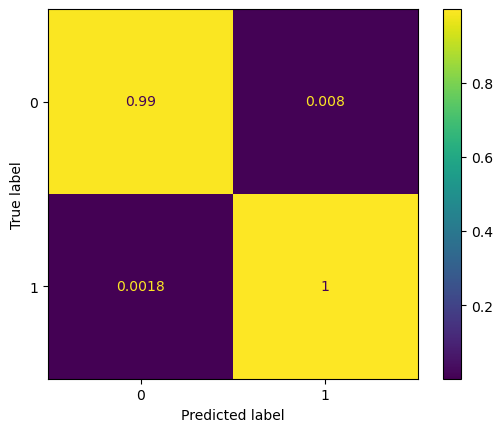

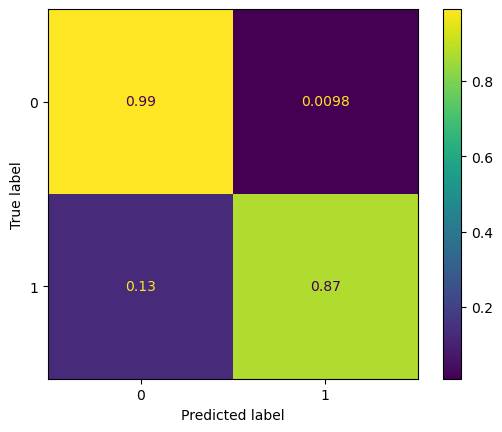

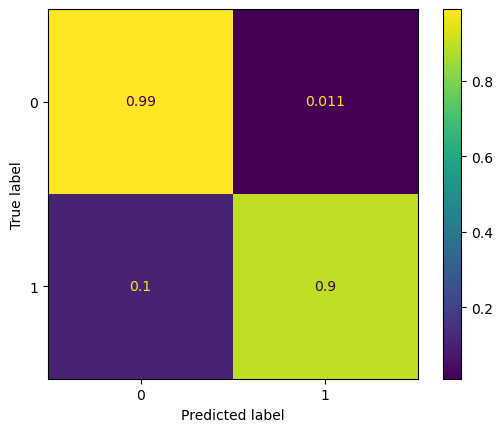

In [300]:
ConfusionMatrixDisplay.from_estimator(rf, X_train, y_train, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf, X_val, y_val, normalize='true')
ConfusionMatrixDisplay.from_estimator(rf, X_test, y_test, normalize='true')

Analysing feature importance in the model

In [301]:
rf.feature_importances_

array([0.01730042, 0.10773397, 0.1939682 , 0.03851069, 0.09242864,
       0.02369589, 0.02694833, 0.12341335, 0.16673294, 0.09925179,
       0.04735441, 0.06266136])

In [303]:
X = df_cleaned[['car_model',
       'age_of_vehicle_years', 'sched_serv_warr', 'non_sched_serv_warr',
       'sched_serv_paid', 'non_sched_serv_paid', 'total_paid_services',
       'total_services', 'mth_since_last_serv', 'annualised_mileage',
       'num_dealers_visited', 'num_serv_dealer_purchased']]

In [304]:
#dataframe with the values
feat_imp_rf = pd.DataFrame(
    {
     'feature': X.columns,
     'feature_importance': rf.feature_importances_
     }
)

In [305]:
feat_imp_rf = feat_imp_rf.sort_values('feature_importance', ascending=False).reset_index(drop=True)
feat_imp_rf

,feature,feature_importance
0,sched_serv_warr,0.193968
1,mth_since_last_serv,0.166733
2,total_services,0.123413
3,age_of_vehicle_years,0.107734
4,annualised_mileage,0.099252
5,sched_serv_paid,0.092429
6,num_serv_dealer_purchased,0.062661
7,num_dealers_visited,0.047354
8,non_sched_serv_warr,0.038511
9,total_paid_services,0.026948


In [306]:
import altair as alt

alt.Chart(feat_imp_rf).mark_bar().encode(
    x='feature_importance',
    y=alt.Y("feature", sort='-x'),
    tooltip=['feature','feature_importance'])

alt.Chart(...)

In the random forest model, the variables Gender, car_segment, and age_band are not adding value to the learning process. The scores obtained with and without the variables are the same. This shows that we can remove these columns

**[7.6]** Random Forest Classifier with Random Search using one hot encoder

used data with model and car segment like one hot encoding

In [234]:
df_cleaned2 = pd.read_csv("df_cleaned2.csv")
#clean columns
df_cleaned2.drop(df_cleaned2.columns[0], axis=1, inplace=True)

In [235]:
df_cleaned2.columns

Index(['Target', 'age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9'],
      dtype='object')

In [236]:
from sklearn.model_selection import train_test_split

In [237]:
X = df_cleaned2[['age_of_vehicle_years', 'sched_serv_warr',
       'non_sched_serv_warr', 'sched_serv_paid', 'non_sched_serv_paid',
       'total_paid_services', 'total_services', 'mth_since_last_serv',
       'annualised_mileage', 'num_dealers_visited',
       'num_serv_dealer_purchased', 'LCV', 'Large/SUV', 'Other',
       'Small/Medium', 'model_1', 'model_10', 'model_11', 'model_12',
       'model_13', 'model_14', 'model_15', 'model_16', 'model_17', 'model_18',
       'model_19', 'model_2', 'model_3', 'model_4', 'model_5', 'model_6',
       'model_7', 'model_8', 'model_9']].values
y = df_cleaned2['Target'].values

In [238]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_data, y_data, test_size=0.2, random_state=42)

In [239]:
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.model_selection import StratifiedKFold

In [240]:
hyperparams_dist = {
    'n_estimators': randint(65, 80),
    'max_depth': randint(20, 40),
    'min_samples_leaf': randint(1, 11),
    'max_features': randint(1, 9)
    }
hyperparams_dist

{'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1bacaf70>,
 'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1bac7250>,
 'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1ba2bd00>,
 'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen at 0x22c1bac7610>}

In [241]:
#instantiate the RandomForestClassifier 
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

In [242]:
f2_scorer = make_scorer(fbeta_score, beta=2, pos_label=1, average='binary')

In [243]:
#Instantiate a KFold 
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

In [244]:
#Instantiate a GridSearchCV
random_search_rf = RandomizedSearchCV(rf, hyperparams_dist, cv=kfold, scoring=f2_scorer, verbose=2, return_train_score = True, n_jobs= -1, random_state=1)

In [245]:
#Fit the random Search on the training set
random_search_rf.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=1, shuffle=True),
                   estimator=RandomForestClassifier(class_weight='balanced',
                                                    random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BAC7250>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BAC7610>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BA2BD00>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000022C1BACAF70>},
                   random_state=1, return_train_score=True,
                   scoring=make_scorer(fbeta_score, beta=2, pos_label=1, average=binary),
                   verbos

In [246]:
random_search_rf.best_params_

{'max_depth': 27, 'max_features': 8, 'min_samples_leaf': 7, 'n_estimators': 74}

In [247]:
print(random_search_rf.score(X_train, y_train))
print(random_search_rf.score(X_val, y_val))
print(random_search_rf.score(X_test, y_test))

0.9167686658506733
0.8172289551261054
0.8346293416277863


The performance of the model decreased. Variables with encoder are prefered.

## 8. Conclusion

Random forest with variables based on feature importance [7.5] is the model that best demonstrated fit to the data and obtained a higher f2 score performance than in the rest of the models.
Compared to other algorithms, this model significantly increased performance in training and testing. However, it still overfits, but to a lower extent.

Taking into account the objective of the training, this model presents acceptable results that can be used by the business to launch the sales campaign, with a final score of approx 84.9% in the test data.

## 9. References

Brownlee, J. (2020, January 12). How to Fix k-Fold Cross-Validation for Imbalanced Classification. MachineLearningMastery.Com. https://machinelearningmastery.com/cross-validation-for-imbalanced-classification/

Catbuilts. (2018, October 6). Answer to ‘difference between StratifiedKFold and StratifiedShuffleSplit in sklearn’. Stack Overflow. https://stackoverflow.com/a/52677641

Ellis, C. (2021, August 24). Random forest overfitting. Crunching the Data. https://crunchingthedata.com/random-forest-overfitting/

Saxena, S. (2020, March 12). A Beginner’s Guide to Random Forest Hyperparameter Tuning. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/03/beginners-guide-random-forest-hyperparameter-tuning/

scikit-learn developers. (2023a). 3.3. Metrics and scoring: Quantifying the quality of predictions. Scikit-Learn. https://scikit-learn/stable/modules/model_evaluation.html

scikit-learn developers. (2023b). Sklearn.metrics.make_scorer. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.metrics.make_scorer.html

scikit-learn developers. (2023c). Sklearn.model_selection.GridSearchCV. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

scikit-learn developers. (2023d). Sklearn.model_selection.StratifiedKFold. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

scikit-learn developers. (2023e). Sklearn.tree.DecisionTreeClassifier. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

scikit-learn developers. (2023f). Sklearn.ensemble.ExtraTreesClassifier. Scikit-Learn. https://scikit-learn/stable/modules/generated/sklearn.ensemble.ExtraTreesClassifier.html

So, A. (2023). Course Modules: 36106 Machine Learning Algorithms and Applications—Autumn 2023. Lab Solutions. https://canvas.uts.edu.au/courses/26202/modules

